<a href="https://colab.research.google.com/github/rautaditya2606/NY_TAXi_Fare/blob/main/NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import random
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
database_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'
od.download(database_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rautaditya2606
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:16<00:00, 105MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [3]:
data_dir = '/content/new-york-city-taxi-fare-prediction/'

In [4]:
# !pip install dask-ml --quiet


In [5]:
!head {data_dir + '/train.csv'}

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [6]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

In [7]:
selected_cols
dtypes = {
 'fare_amount': 'float32',
 'pickup_longitude':'float32',
 'pickup_latitude':'float32',
 'dropoff_longitude':'float32',
 'dropoff_latitude':'float32',
 'passenger_count': 'uint8'
}

In [8]:
def skip_rows(row_idx):
    if row_idx == 0:
        return False
    return random.random() > 0.01
df = pd.read_csv(
    data_dir + '/train.csv',
    usecols=selected_cols,
    dtype=dtypes,
    parse_dates=['pickup_datetime'],
    skiprows=skip_rows
)


In [9]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500000,2015-03-12 08:08:38+00:00,-73.990173,40.756447,-73.985619,40.762829,1
1,8.000000,2014-01-06 21:21:00+00:00,-73.988495,40.717976,-73.978180,40.737408,1
2,17.299999,2010-05-17 07:44:00+00:00,-73.950974,40.785633,-74.010239,40.720303,1
3,12.900000,2009-07-16 20:33:00+00:00,-73.980759,40.680557,-73.989113,40.726788,2
4,16.500000,2013-09-07 22:29:00+00:00,-73.995201,40.731697,-73.949768,40.780346,1
...,...,...,...,...,...,...,...
555014,10.500000,2013-02-23 11:09:41+00:00,-73.958893,40.808971,-73.958878,40.783676,2
555015,5.300000,2010-04-05 19:45:32+00:00,-73.979691,40.773579,-73.985382,40.780308,1
555016,13.500000,2014-02-06 18:57:00+00:00,-73.946014,40.780312,-73.966949,40.803741,2
555017,15.300000,2011-02-20 14:03:00+00:00,-73.991905,40.738361,-73.967690,40.792793,1


In [10]:
test_df = pd.read_csv(data_dir + '/test.csv', parse_dates=['pickup_datetime'])

In [11]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,555019.000000,555019.000000,555019.000000,555016.000000,555016.000000,555019.000000
mean,11.351077,-72.476883,39.903175,-72.490128,39.915993,1.685211
std,9.731212,13.297196,10.988931,11.840525,10.455251,1.308210
min,-89.750000,-2973.644775,-3413.982666,-2913.518555,-3092.393555,0.000000
25%,6.000000,-73.992088,40.734833,-73.991432,40.733898,1.000000
50%,8.500000,-73.981796,40.752579,-73.980141,40.753094,1.000000
75%,12.500000,-73.967094,40.767040,-73.963608,40.768093,2.000000
max,321.000000,3224.134277,2937.561768,1198.304688,2937.561768,6.000000


In [13]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [14]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
train_df.shape, val_df.shape

((444015, 7), (111004, 7))

In [16]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [17]:
list(train_df.columns)

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [18]:
input_cols = [
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']
target_cols = 'fare_amount'

In [19]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]

In [20]:
def add_dateparts(df, col):
  df[col+'_year'] = df[col].dt.year
  df[col+'_month'] = df[col].dt.month
  df[col+'_day'] = df[col].dt.day
  df[col+'_weekday'] = df[col].dt.weekday
  df[col+'_hour'] = df[col].dt.hour

In [21]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')

In [22]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
142129,16.5,2009-01-01 03:30:24+00:00,-74.008141,40.722179,-73.969078,40.694752,2,2009,1,1,3,3
474742,3.5,2014-10-20 20:56:00+00:00,-73.976646,40.780251,-73.980988,40.778412,4,2014,10,20,0,20
90937,8.5,2010-11-18 06:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2010,11,18,3,6
42422,7.3,2011-11-12 04:10:00+00:00,-73.999023,40.754513,-73.999115,40.732471,5,2011,11,12,5,4
487175,4.9,2009-10-29 18:13:45+00:00,-73.969345,40.765053,-73.963531,40.774513,1,2009,10,29,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,8.0,2013-06-27 07:01:00+00:00,-73.987862,40.744041,-73.974075,40.757641,1,2013,6,27,3,7
259178,7.5,2013-08-19 17:56:00+00:00,-73.986534,40.742981,-73.978790,40.753868,1,2013,8,19,0,17
365838,7.7,2010-06-23 19:23:00+00:00,-73.991463,40.701931,-73.991463,40.701931,5,2010,6,23,2,19
131932,14.1,2011-05-07 16:42:00+00:00,-73.956093,40.767929,-73.998901,40.728302,1,2011,5,7,5,16


In [23]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
160547,6.5,2010-04-18 18:56:27+00:00,-74.007080,40.741821,-73.995850,40.760109,1,2010,4,18,6,18
449424,7.7,2012-06-22 18:58:00+00:00,-74.000114,40.730473,-73.981773,40.759487,1,2012,6,22,4,18
422952,14.0,2013-03-01 23:57:17+00:00,-73.974060,40.783867,-73.989578,40.739758,2,2013,3,1,4,23
288443,12.5,2010-11-24 10:05:00+00:00,-73.990685,40.761757,-73.955856,40.779079,3,2010,11,24,2,10
118682,20.0,2014-10-26 23:57:47+00:00,-73.959610,40.762302,-73.882507,40.730755,1,2014,10,26,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...
239962,14.9,2010-10-14 20:51:30+00:00,-73.990524,40.702831,-73.990746,40.750328,1,2010,10,14,3,20
144717,13.3,2012-08-16 11:49:59+00:00,-73.987610,40.738304,-73.954147,40.784367,1,2012,8,16,3,11
217658,10.5,2014-02-07 22:26:00+00:00,-73.978645,40.777584,-73.961090,40.801163,1,2014,2,7,4,22
545783,6.5,2012-07-07 05:37:00+00:00,-73.956734,40.716724,-73.966087,40.695965,1,2012,7,7,5,5


In [24]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


In [25]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

def add_trip_dist(df):
    df['trip_distance'] = haversine_vectorized(
        df['pickup_latitude'],
        df['pickup_longitude'],
        df['dropoff_latitude'],
        df['dropoff_longitude']
    )


In [26]:
add_trip_dist(train_df)
add_trip_dist(val_df)
add_trip_dist(test_df)

In [27]:
val_df.head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
160547,6.5,2010-04-18 18:56:27+00:00,-74.00708,40.741821,-73.99585,40.760109,1,2010,4,18,6,18,2.242734


In [28]:
train_df.head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
142129,16.5,2009-01-01 03:30:24+00:00,-74.008141,40.722179,-73.969078,40.694752,2,2009,1,1,3,3,4.487916


In [29]:
test_df.head(1)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.97332,40.763805,-73.98143,40.743835,1,2015,1,27,1,13,2.32326


In [30]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [31]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name+'_drop_distance'] = haversine_vectorized(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [32]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [33]:
add_landmarks(train_df)
add_landmarks(val_df)
add_landmarks(test_df)

In [34]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [35]:
train_df = remove_outliers(train_df)

In [36]:
val_df = remove_outliers(val_df)

In [37]:
# train_df.to_parquet('train.parquet')

In [38]:
# val_df.to_parquet('val.parquet')

In [39]:
# test_df.to_parquet('test.parquet')

In [40]:
list(train_df.columns)

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'pickup_datetime_year',
 'pickup_datetime_month',
 'pickup_datetime_day',
 'pickup_datetime_weekday',
 'pickup_datetime_hour',
 'trip_distance',
 'jfk_drop_distance',
 'lga_drop_distance',
 'ewr_drop_distance',
 'met_drop_distance',
 'wtc_drop_distance']

In [41]:
input_cols = ['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'pickup_datetime_year',
 'pickup_datetime_month',
 'pickup_datetime_day',
 'pickup_datetime_weekday',
 'pickup_datetime_hour',
 'trip_distance',
 'jfk_drop_distance',
 'lga_drop_distance',
 'ewr_drop_distance',
 'met_drop_distance',
 'wtc_drop_distance']

In [42]:
target_cols = 'fare_amount'

In [43]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]
test_inputs = test_df[input_cols]

In [44]:
train_targets = train_df[target_cols]
val_targets = val_df[target_cols]

In [45]:
def evaluate(model):
  train_pred = model.predict(train_inputs)
  train_rmse = np.sqrt(mean_squared_error(train_pred, train_targets))
  val_pred = model.predict(val_inputs)
  val_rmse = np.sqrt(mean_squared_error(val_pred, val_targets))
  return train_pred, val_pred, train_rmse, val_rmse

In [46]:
# model1 = Ridge(random_state=42).fit(train_inputs, train_targets)

In [48]:
# evaluate(model1)

In [49]:
# model2 = RandomForestRegressor(n_estimators=200, max_depth=10, n_jobs=-1, random_state=42).fit(train_inputs, train_targets)

In [50]:
# evaluate(model3)

In [51]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [52]:
# predict_and_submit(model3, 'xgb_submission.csv')

In [53]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse, val_rmse


def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [55]:
# %%time
# test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 300], **best_params)

In [56]:
# %%time
# test_param_and_plot(XGBRegressor, 'max_depth', [3,5,7], **best_params)

In [57]:
#3.65725

In [70]:
model4 = LGBMRegressor(num_leaves=64, max_depth=5, learning_rate=0.1, n_estimators=600, n_jobs=-1, verbose=-1).fit(train_inputs, train_targets)

In [67]:
evaluate(model4)#3.60231

(array([12.1891667 ,  4.10354005,  7.31081824, ...,  8.16707236,
        14.87423333,  7.85019504]),
 array([ 7.20937446, 11.45132728, 15.14950743, ...,  8.90475567,
         8.17260406, 14.60994502]),
 np.float64(3.3030811364863695),
 np.float64(3.602310632925782))

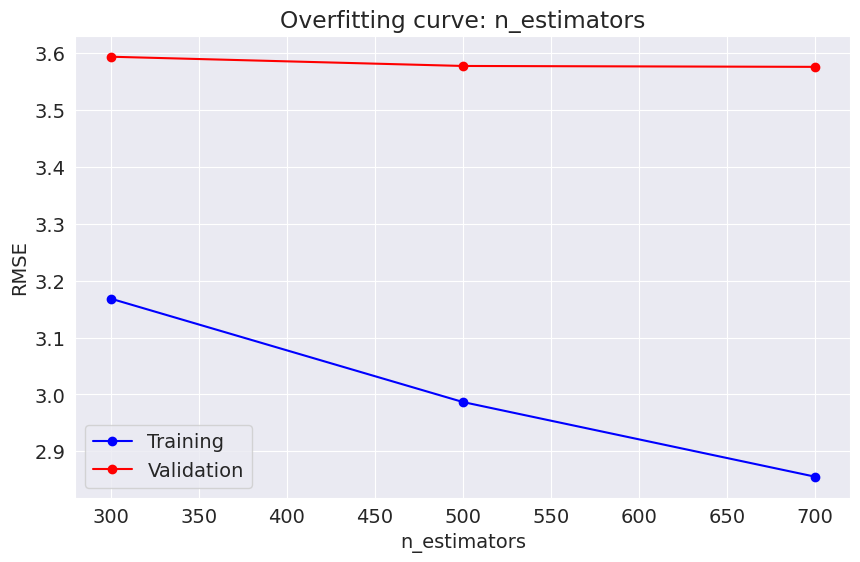

In [69]:
best_params = {"num_leaves":64,
               "max_depth":7,
               "learning_rate":0.1,
              #  "n_estimators":600,
               "n_jobs":-1,
               'verbose' : -1,
               'min_data_in_leaf' : 20
               }


test_param_and_plot(LGBMRegressor, 'n_estimators', [300,500,700], **best_params )

In [63]:
# gpu_df = dask_cudf.read_csv(data_dir + '/train.csv')

In [ ]:
predict_and_submit(model4, 'xgb_submission.csv')